In [1]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats
from mpl_toolkits.mplot3d import Axes3D


In [35]:
#"C:\\Users\\f002tj9\\Documents\\Research\\kj\\Tubes\\TubeFile2020\\virat4_tubelistv0.csv"

tubefile = "C:\\Users\\f002tj9\\Documents\\Research\\kj\\Tubes\\TubeFile2020\\ski1_tubelistv0.csv"

def readTubes(tubefile):
    # This function reads in a CSV and converts the tube data into a numpy array (and dataframe). 
    # Each row is a tube slice with the properties [x,y,a,b,rot,f.Vx,Vy,tubenum]
    
    print("Reading from:", tubefile)

    data = pd.read_csv(tubefile)
    #Saving all of the stuff into np arrays (vectors)

    X = np.asarray(data['x'])
    Y = np.asarray(data['y'])
    A = np.asarray(data['a'])
    B = np.asarray(data['b'])
    ROT = np.asarray(data['rot'])
    F = np.asarray(data['f'])
    VX = np.asarray(data['Vx'])
    VY = np.asarray(data['Vy'])
    TNUM = np.asarray(data['tubenum'])
    RR = np.asarray(data['R'])
    GG = np.asarray(data['G'])
    BB = np.asarray(data['B'])
    
    tubeMtx = np.transpose(np.asarray([X,Y,A,B,ROT,F,VX,VY,RR,GG,BB,TNUM]))
    
    print("We have",len(TNUM) ,"tube slices and ", max(TNUM)+1, "tubes.")
    
    return tubeMtx, data


def getTube(tubeData, tubeNum):
    
    T = np.array([tubeData[i,:] for i in range(len(tubeData)) if DATA[i,-1] ==tubeNum])
    return T


def showTubes(listOfTubes=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel("frames")
    
    if (listOfTubes==None):
        for t in range(numTubes):
            T = getTube(DATA,t)
            f = T[:,5]
            x = T[:,0]
            y = T[:,1]
            ax.scatter(f,x,y)
    else:
        for t in range(numTubes):
            if t in listOfTubes:
                T = getTube(DATA,t)
                f = T[:,5]
                x = T[:,0]
                y = T[:,1]
                ax.scatter(f,x,y)
    plt.show()
    
def saveTubesCSVbad(CSVloc, tubesToKeep):
    Tmat = []
    for t in tubesToKeep:
        if t not in SC:
            Tmat.extend(getTube(DATA,t))
        else:
            T = getTube(DATA,t)
            split = round(T.shape[0]/3)
            check = SC[t]
            Tmat.extend(T[(check-1)*split : check*split])
        
    Tmtx=np.asarray(Tmat)

    df = {'x':Tmtx[:,0], 'y':Tmtx[:,1],'a':Tmtx[:,2],'b':Tmtx[:,3],'rot':Tmtx[:,4],'f':Tmtx[:,5],
          'Vx':Tmtx[:,6],'Vy':Tmtx[:,7],'R':Tmtx[:,8] ,'G':Tmtx[:,9],'B':Tmtx[:,10],'tubenum':Tmtx[:,11]}
    DF = pd.DataFrame(df)
    DF.to_csv(CSVloc)

def saveTubesCSV(CSVloc, tubesToKeep):
    Tmat = []
    for t in tubesToKeep:
        Tmat.extend(getTube(DATA,t))
       
    Tmtx=np.asarray(Tmat)

    df = {'x':Tmtx[:,0], 'y':Tmtx[:,1],'a':Tmtx[:,2],'b':Tmtx[:,3],'rot':Tmtx[:,4],'f':Tmtx[:,5],
          'Vx':Tmtx[:,6],'Vy':Tmtx[:,7],'R':Tmtx[:,8] ,'G':Tmtx[:,9],'B':Tmtx[:,10],'tubenum':Tmtx[:,11]}
    DF = pd.DataFrame(df)
    DF.to_csv(CSVloc)

In [36]:

DATA, df_data = readTubes(tubefile)
T = getTube(DATA, 4)
numTubes = int(DATA[-1,-1]) + 1

tubeStats = [] #Jump factor and length (2)


for t in range(numTubes):
    deltaD = 0
    i=0
    T = getTube(DATA,t)
    
    #Calculate "jumpiness"
    while(i+1 < T.shape[0]):
        deltaD += math.sqrt((T[i+1,0] - T[i,0])**2 + (T[i+1,1] - T[i,1])**2 )
        i+=1
    jumpiness = deltaD/T.shape[0]
    
    tubeStats.append((t, jumpiness , T.shape[0]))
    print("Tube",t,"has length",tubeStats[t][2],"and jumpiness =",tubeStats[t][1])



Reading from: C:\Users\f002tj9\Documents\Research\kj\Tubes\TubeFile2020\ski1_tubelistv0.csv
We have 7810 tube slices and  40 tubes.
Tube 0 has length 90 and jumpiness = 18.162591287644656
Tube 1 has length 23 and jumpiness = 10.472847101984573
Tube 2 has length 44 and jumpiness = 22.004318699676293
Tube 3 has length 112 and jumpiness = 0.6610207179411819
Tube 4 has length 608 and jumpiness = 1.2150524462349626
Tube 5 has length 5 and jumpiness = 63.976635411589655
Tube 6 has length 444 and jumpiness = 0.4866162056115054
Tube 7 has length 31 and jumpiness = 106.51777076385088
Tube 8 has length 207 and jumpiness = 36.06492019744135
Tube 9 has length 110 and jumpiness = 33.11342943842045
Tube 10 has length 322 and jumpiness = 2.410848497946022
Tube 11 has length 175 and jumpiness = 2.267530549374647
Tube 12 has length 23 and jumpiness = 16.1846187141745
Tube 13 has length 36 and jumpiness = 88.01036950507151
Tube 14 has length 40 and jumpiness = 0.2972115347082821
Tube 15 has length 15 an

Tube: 35
[59.29764582770121, 45.81899190408114, 2.763890286321022]
35 makes it in
Tube: 23
[2.822482727711936, 16.45733973676174, 106.53449158314875]
23 makes it in
Tube: 21
[93.02744470258331, 107.79321955472382, 58.353231433862085]
H: [38, 6, 3, 4, 11, 10, 32, 37, 28, 39, 19]
L: [0, 9, 17, 20, 25, 27, 34, 35, 23]
BYE [8, 5, 21, 13, 7, 14, 16, 24, 31, 22, 30, 33, 1, 29, 12, 15, 26, 2, 18, 36, 5, 13, 7]
10.950067891801929


<IPython.core.display.Javascript object>


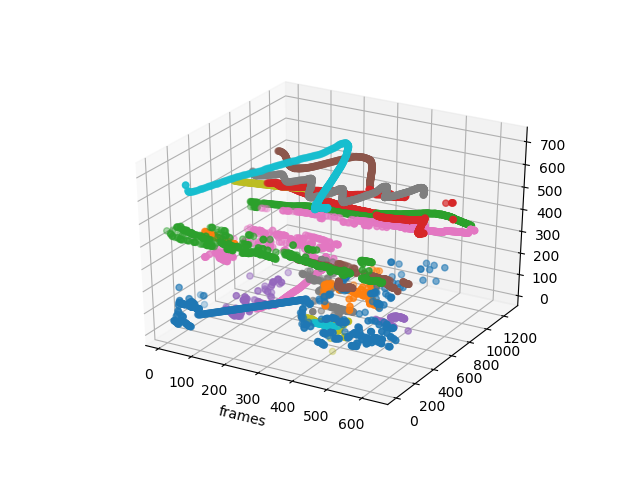

<IPython.core.display.Javascript object>


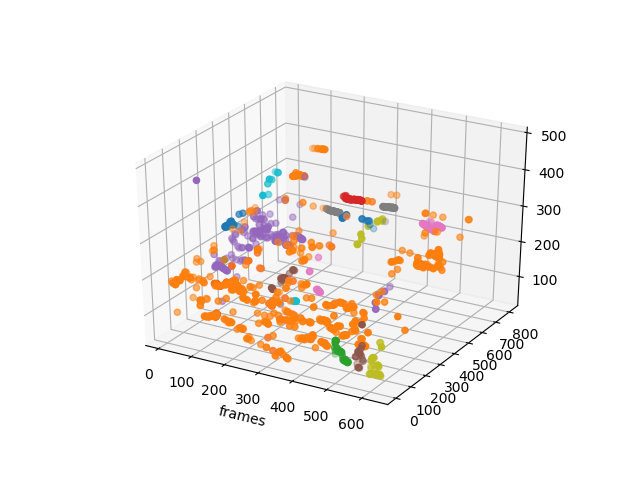

<IPython.core.display.Javascript object>


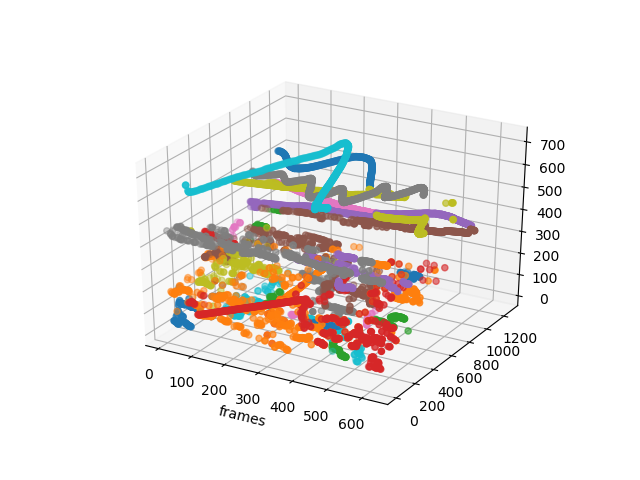

In [37]:
#DO SOMETHING TO ADD TUBENUMS TO JUMPYLIST (FOR DELETION)
#A: SPLIT INTO THREE(FIVE?) GROUPS AND TAKE MOST JUMPY
#B: CHECK AVG AND TAKE ANYTHING ABOVE 2 ST DEVS AWAY
#C: 


jumpyList = []

# Populate jumpiness array
J = np.zeros(numTubes)
for t in range(numTubes):
    J[t] = tubeStats[t][1]

'''
#METHOD A. Take the most jumpy 5th and delete them
tubeStats.sort(key = lambda x: x[1])  
k = round(numTubes *0.2)
print(tubeStats)
for i in range(k):
    jumpyList.append(tubeStats[-(i+1)][0])  
print()
print(jumpyList)


#-----------------------------------------------------------------
#METHOD B. Delete > 2 st. devs away from mean jumpiness
J = np.zeros(numTubes)
for t in range(numTubes):
    J[t] = tubeStats[t][1]
cutoff = 2*np.std(J) + np.mean(J)
print(J)
print("IQR=", scipy.stats.iqr(J))
print("Mean=", np.mean(J))


jumpyList = [tup[0] for tup in tubeStats if tup[1] > cutoff]
'''
#-----------------------------------------------------------------
#METHOD C. Above the median-> high tier. <2 seconds -> del
highList = []
lowList = []
tubeStats.sort(key = lambda x: x[1]) 
cutoff = tubeStats[-round(numTubes *0.2)][1]

highList.extend([tup[0] for tup in tubeStats if ((tup[1]<np.median(J)) and (tup[2]>60)) ])
jumpyList.extend([tup[0] for tup in tubeStats if  ((tup[1]> cutoff) and (tup[1]>10)) ])
jumpyList.extend([tup[0] for tup in tubeStats if (tup[2]<60) ])
lowList.extend(t for t in range(numTubes) if t not in jumpyList and t not in highList)


splitcheck =[]
#GO THRU JL AND MOVE ANY "DECENT" TUBES TO LL
for j in jumpyList:
    jtube = getTube(DATA,j)
    jstats = [stat for stat in tubeStats if stat[0] == j].pop(0)
    
    if jstats[2] > 60: #If more than 2 seconds long...
        
        split = round(jstats[2]/3)
        splitJF = []
        
        print("Tube:",j)
        
        deltaD=0
        i=0
        #Calculate "jumpiness"
        while(i+1 < split):
            deltaD += math.sqrt((jtube[i+1,0] - jtube[i,0])**2 + (jtube[i+1,1] - jtube[i,1])**2 )
            i+=1
        splitJF.append(deltaD/split)
        deltaD=0
        while(i+1 < 2*split):
            deltaD += math.sqrt((jtube[i+1,0] - jtube[i,0])**2 + (jtube[i+1,1] - jtube[i,1])**2 )
            i+=1
        splitJF.append(deltaD/split)
        deltaD=0
        while(i+1 < jstats[2]):
            deltaD += math.sqrt((jtube[i+1,0] - jtube[i,0])**2 + (jtube[i+1,1] - jtube[i,1])**2 )
            i+=1
        splitJF.append(deltaD/split)
        
        print(splitJF)
        if any(s < np.mean(J)/2 for s in splitJF):
            splitcheck.append((j,np.argmin(splitJF)+1))
            jumpyList.remove(j)
            lowList.append(j)
            print(j, "makes it in")

#lowList.extend([tup[0] for tup in tubeStats if ((tup[0] not in highList) and (tup[2]>60)) ])
#jumpyList.extend(t for t in range(numTubes) if t not in lowList and t not in highList)

SC = dict(splitcheck)
print("H:", highList)
print("L:", lowList)
print("BYE", jumpyList)
print(np.median(J))

%matplotlib notebook
notjumpyList = highList +lowList

showTubes(notjumpyList)
showTubes(jumpyList)
showTubes()



In [38]:
#"C:\\Users\\f002tj9\\Documents\\Research\\kj\\Tubes\\TubeFile2020\\virat4_tubelistv0.csv"

outCSV = "C:\\Users\\f002tj9\\Documents\\Research\\kj\\Tubes\\TubeFile2020\\ski1_tubelistv1.csv"

saveTubesCSV(outCSV,notjumpyList)